In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings


warnings.filterwarnings("ignore")

import scipy.stats as stats

In [2]:
df = pd.read_csv('C:\\Users\\Acer\\Downloads\\Telecommunication customer churn.csv',sep=';')

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783","33,964131","-118,272783",Male,...,Month-to-month,Yes,Mailed check,"53,85","108,15",Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742","34,059281","-118,307420",Female,...,Month-to-month,Yes,Electronic check,"70,7","151,65",Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953","34,048013","-118,293953",Female,...,Month-to-month,Yes,Electronic check,"99,65","820,5",Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709","34,062125","-118,315709",Female,...,Month-to-month,Yes,Electronic check,"104,8","3046,05",Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293","34,039224","-118,266293",Male,...,Month-to-month,Yes,Bank transfer (automatic),"103,7","5036,3",Yes,1,89,5340,Competitor had better devices


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         7043 non-null   object
 1   Count              7043 non-null   int64 
 2   Country            7043 non-null   object
 3   State              7043 non-null   object
 4   City               7043 non-null   object
 5   Zip Code           7043 non-null   int64 
 6   Lat Long           7043 non-null   object
 7   Latitude           7043 non-null   object
 8   Longitude          7043 non-null   object
 9   Gender             7043 non-null   object
 10  Senior Citizen     7043 non-null   object
 11  Partner            7043 non-null   object
 12  Dependents         7043 non-null   object
 13  Tenure Months      7043 non-null   int64 
 14  Phone Service      7043 non-null   object
 15  Multiple Lines     7043 non-null   object
 16  Internet Service   7043 non-null   object


In [5]:
# Replace empty spaces with '0' in 'Total Charges' column
df['Total Charges'] = df['Total Charges'].replace(' ', '0')

# Convert 'Total Charges' column to strings
df['Total Charges'] = df['Total Charges'].astype(str)

# Replace commas with periods (for decimal points)
df['Total Charges'] = df['Total Charges'].str.replace(',', '.')

# Now, convert the column to float
df['Total Charges'] = df['Total Charges'].astype(float)

df['Monthly Charges'] = df['Total Charges'].astype(float)

In [6]:
df.shape

(7043, 33)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

<Axes: >

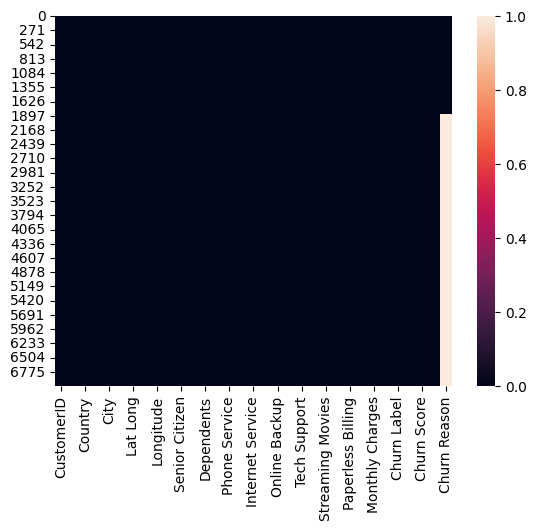

In [9]:
sns.heatmap(df.isnull())

In [10]:
# Fill missing values in 'Churn Reason' with 'Not specified'
df['Churn Reason'].fillna('Not specified', inplace=True)


In [11]:
df.isnull().sum()

CustomerID           0
Count                0
Country              0
State                0
City                 0
Zip Code             0
Lat Long             0
Latitude             0
Longitude            0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Score          0
CLTV                 0
Churn Reason         0
dtype: int64

In [12]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783","33,964131","-118,272783",Male,...,Month-to-month,Yes,Mailed check,108.15,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742","34,059281","-118,307420",Female,...,Month-to-month,Yes,Electronic check,151.65,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953","34,048013","-118,293953",Female,...,Month-to-month,Yes,Electronic check,820.50,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709","34,062125","-118,315709",Female,...,Month-to-month,Yes,Electronic check,3046.05,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293","34,039224","-118,266293",Male,...,Month-to-month,Yes,Bank transfer (automatic),5036.30,5036.30,Yes,1,89,5340,Competitor had better devices


In [13]:

for column in df.columns:
    print(f"{column}: {df[column].nunique()}")


CustomerID: 7043
Count: 1
Country: 1
State: 1
City: 1129
Zip Code: 1652
Lat Long: 1652
Latitude: 1652
Longitude: 1651
Gender: 2
Senior Citizen: 2
Partner: 2
Dependents: 2
Tenure Months: 73
Phone Service: 2
Multiple Lines: 3
Internet Service: 3
Online Security: 3
Online Backup: 3
Device Protection: 3
Tech Support: 3
Streaming TV: 3
Streaming Movies: 3
Contract: 3
Paperless Billing: 2
Payment Method: 4
Monthly Charges: 6531
Total Charges: 6531
Churn Label: 2
Churn Value: 2
Churn Score: 85
CLTV: 3438
Churn Reason: 21


In [14]:
churn_by_contract = df.groupby('Contract')['Churn Label'].value_counts(normalize=True).unstack()
print(churn_by_contract)

Churn Label           No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


<Axes: >

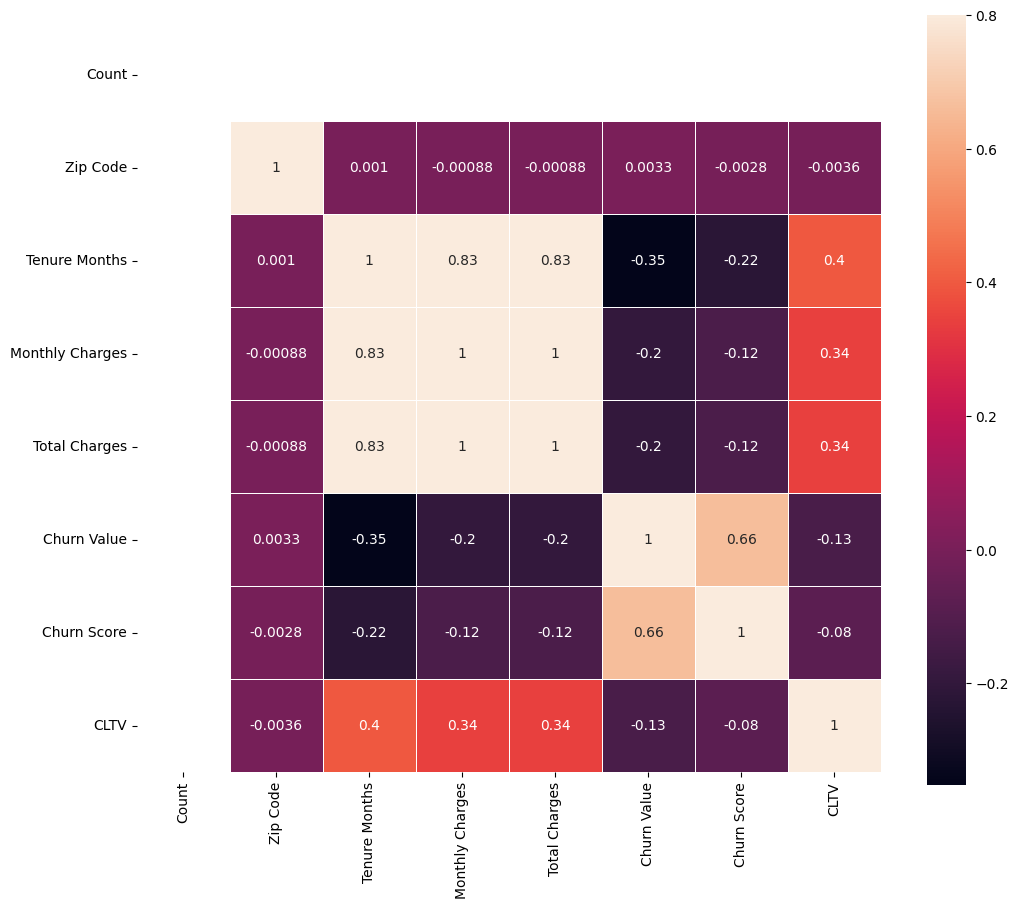

In [15]:
#correlation
df_num = df.select_dtypes(include='number')
corrmat = df_num.corr()
f , ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmat, vmax=0.8, square= True,linewidths=0.5,annot=True)

In [16]:
df_num.head()

,Count,Zip Code,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,1,90003,2,108.15,108.15,1,86,3239
1,1,90005,2,151.65,151.65,1,67,2701
2,1,90006,8,820.50,820.50,1,86,5372
3,1,90010,28,3046.05,3046.05,1,84,5003
4,1,90015,49,5036.30,5036.30,1,89,5340


In [17]:
#applying log transformation
df['Churn Score'] = np.log(df['Churn Score'])

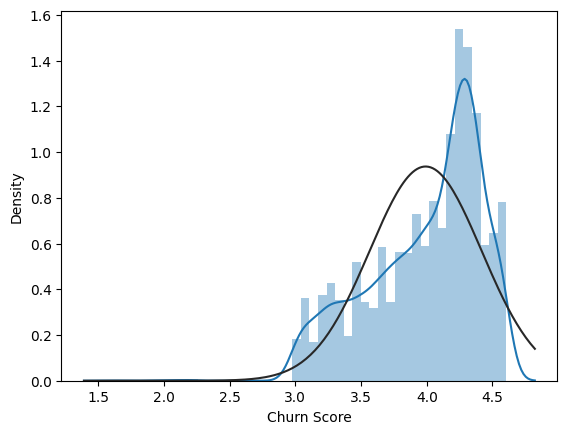

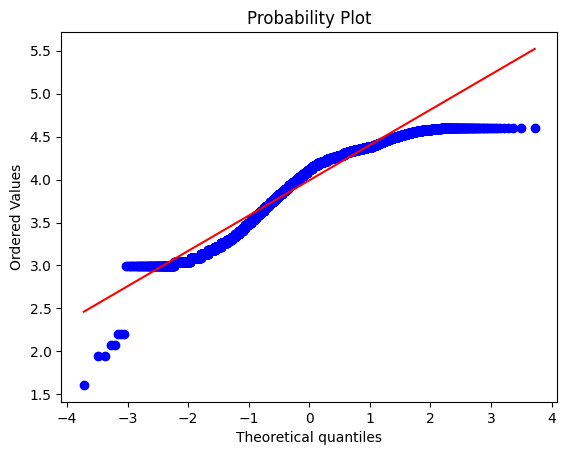

In [18]:
#transformed histogram and normal probability plot
sns.distplot(df['Churn Score'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Churn Score'], plot=plt)

<Axes: xlabel='Total Charges', ylabel='Density'>

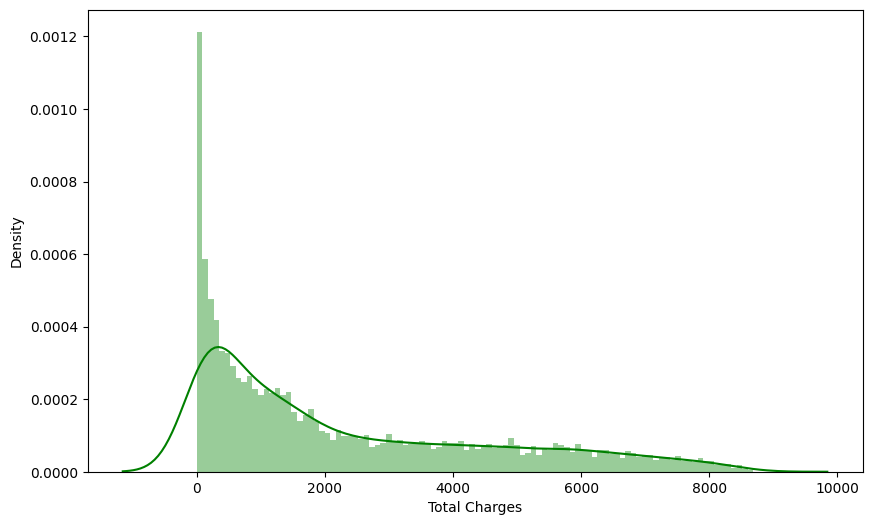

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(df['Total Charges'], color='g', bins=100, hist_kws={'alpha':0.4})

In [20]:
df_num.head()

,Count,Zip Code,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,1,90003,2,108.15,108.15,1,86,3239
1,1,90005,2,151.65,151.65,1,67,2701
2,1,90006,8,820.50,820.50,1,86,5372
3,1,90010,28,3046.05,3046.05,1,84,5003
4,1,90015,49,5036.30,5036.30,1,89,5340


array([[<Axes: title={'center': 'Count'}>,
        <Axes: title={'center': 'Zip Code'}>,
        <Axes: title={'center': 'Tenure Months'}>],
       [<Axes: title={'center': 'Monthly Charges'}>,
        <Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Churn Value'}>],
       [<Axes: title={'center': 'Churn Score'}>,
        <Axes: title={'center': 'CLTV'}>, <Axes: >]], dtype=object)

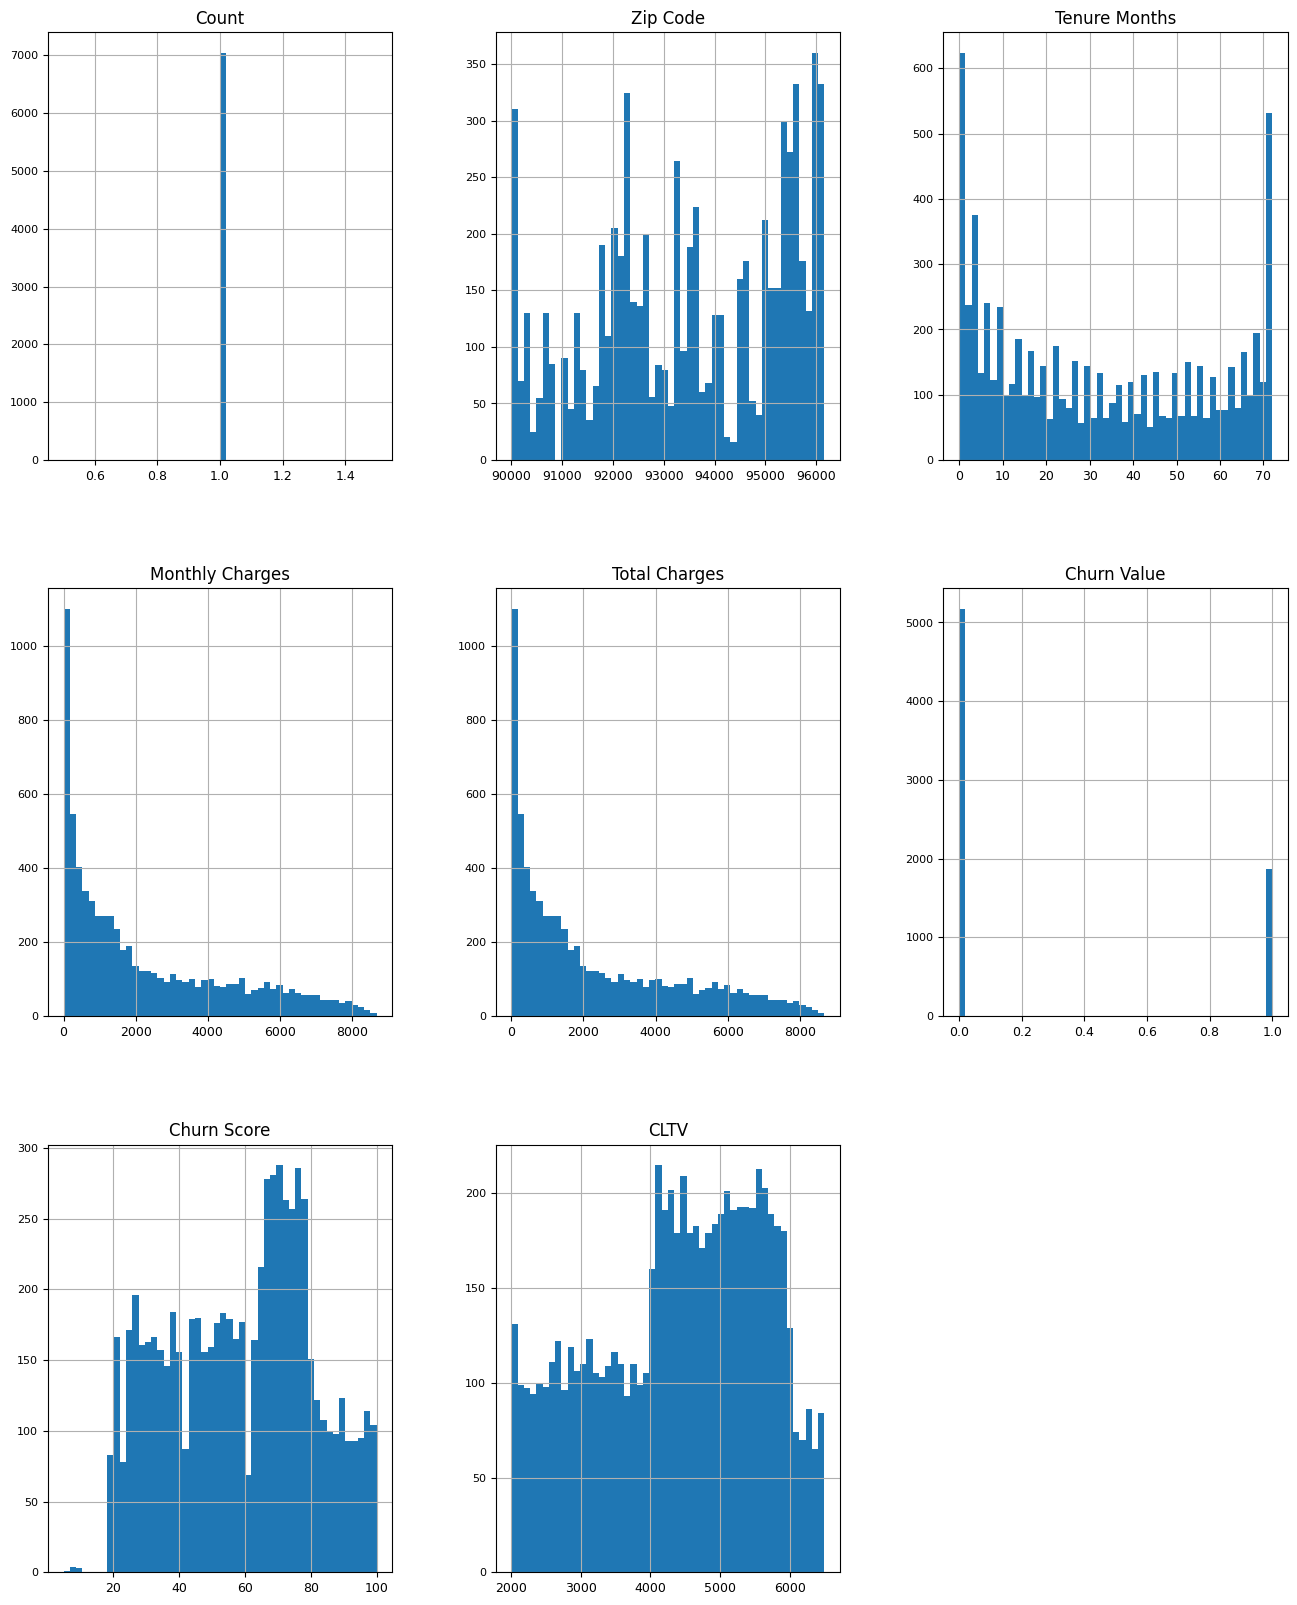

In [21]:
df_num.hist(figsize=(16,20),bins=50,xlabelsize=9,ylabelsize=8)

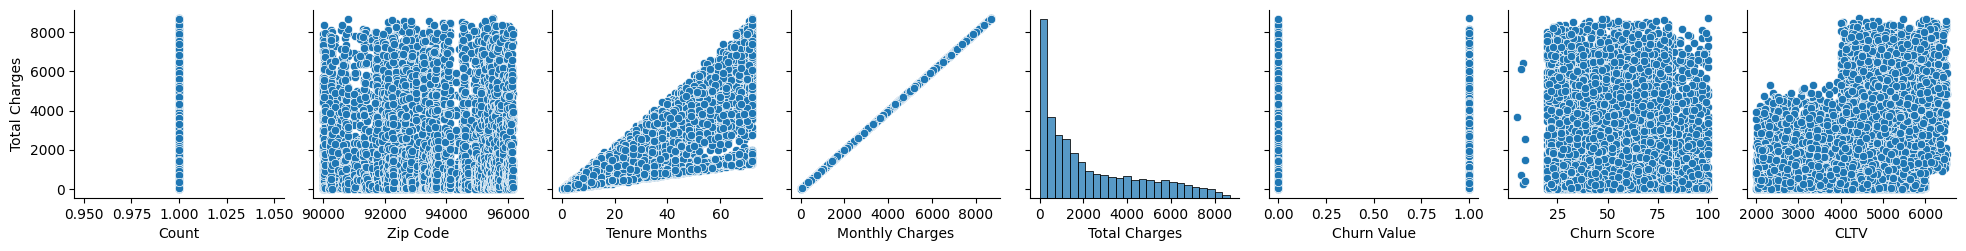

In [22]:
sns.pairplot(data=df_num, y_vars=['Total Charges'])

<Axes: >

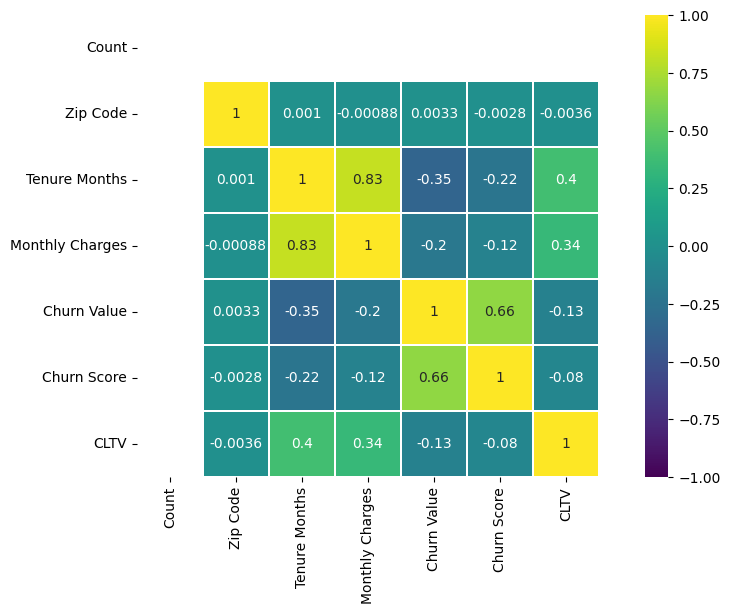

In [23]:
corr = df_num.drop('Total Charges', axis=1).corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr[(corr >=0.5)| (corr <=0.4)], 
           cmap='viridis',vmax=1.0,vmin=-1.0,linewidth=0.1,annot=True,
           square=True)


In [24]:
df['Country'] = df['Country'].astype('category')
df['City'] = df['City'].astype('category')
df['Gender']=df['Gender'].astype('category')
df['State']=df['State'].astype('category')
df['Monthly Charges']=df['Monthly Charges'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         7043 non-null   object  
 1   Count              7043 non-null   int64   
 2   Country            7043 non-null   category
 3   State              7043 non-null   category
 4   City               7043 non-null   category
 5   Zip Code           7043 non-null   int64   
 6   Lat Long           7043 non-null   object  
 7   Latitude           7043 non-null   object  
 8   Longitude          7043 non-null   object  
 9   Gender             7043 non-null   category
 10  Senior Citizen     7043 non-null   object  
 11  Partner            7043 non-null   object  
 12  Dependents         7043 non-null   object  
 13  Tenure Months      7043 non-null   int64   
 14  Phone Service      7043 non-null   object  
 15  Multiple Lines     7043 non-null   object  
 16  Intern

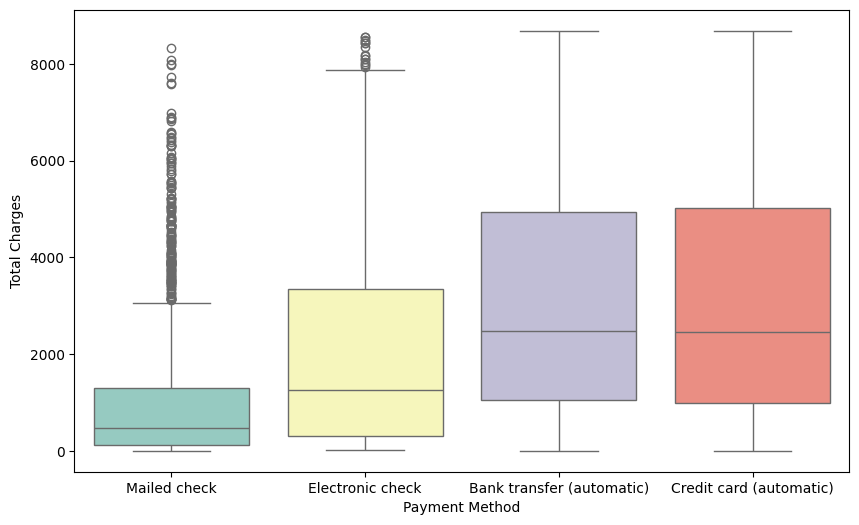

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6)) 
ax = sns.boxplot(x='Payment Method', y='Total Charges', data=df,palette='Set3')

plt.show()


In [26]:
df_categ = df.select_dtypes(include ='category')
df_categ.tail()

,Country,State,City,Gender
7038,United States,California,Landers,Female
7039,United States,California,Adelanto,Male
7040,United States,California,Amboy,Female
7041,United States,California,Angelus Oaks,Female
7042,United States,California,Apple Valley,Male


In [59]:
import pandas as pd
import numpy as np
from scipy import stats

def bivstats(df, label):
    output_df = pd.DataFrame(columns=['r', 'F', 'X2', 'p-value'])

    for col in df:
        if df[col].isnull().sum() == 0:
            if pd.api.types.is_numeric_dtype(df[col]):
                r, p = stats.pearsonr(df[label], df[col])
                output_df.loc[col] = [round(r, 3), '-', '-', round(p, 3)]
        else:
            output_df.loc[col] = [np.nan, np.nan, np.nan, '-']

    output_df = output_df.sort_values(by=['r'], ascending=False) 
    return output_df
result = bivstats(df, 'Churn Value')
print(result)


                     r  F X2  p-value
Churn Value      1.000  -  -    0.000
Churn Score      0.584  -  -    0.000
Zip Code         0.003  -  -    0.779
CLTV            -0.127  -  -    0.000
Monthly Charges -0.198  -  -    0.000
Total Charges   -0.198  -  -    0.000
Tenure Months   -0.352  -  -    0.000
Count              NaN  -  -      NaN


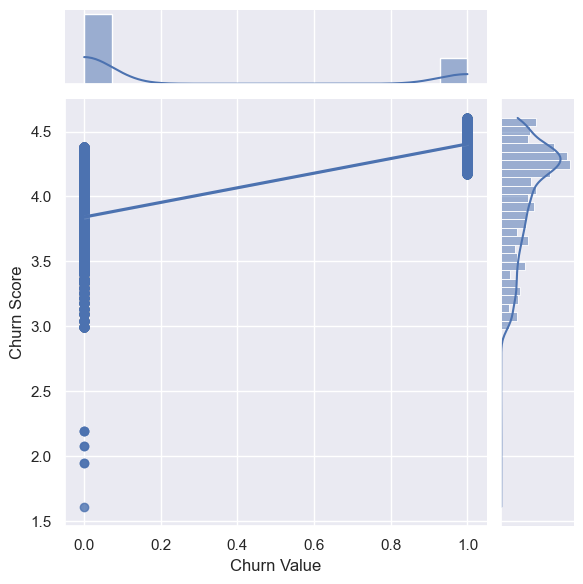

In [56]:
def scatter(feature,label):
    sns.set(color_codes=True)
    sns.jointplot(x=feature,y=label,kind='reg')
scatter(df['Churn Value'],df['Churn Score'])

                     r  F X2  p-value
Monthly Charges  1.000  -  -    0.000
Total Charges    1.000  -  -    0.000
Tenure Months    0.826  -  -    0.000
CLTV             0.342  -  -    0.000
Zip Code        -0.001  -  -    0.941
Churn Score     -0.109  -  -    0.000
Churn Value     -0.198  -  -    0.000
Count              NaN  -  -      NaN
